In [1]:
# choosing only 4 features;  
# 'feature_names': ('alcohol','sulphates','total sulfur dioxide','volatile acidity')

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix,make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict

In [3]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')
X=data.loc[:,['alcohol','sulphates','total sulfur dioxide','volatile acidity']]
y=data.iloc[:,11]

In [4]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [5]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])
label_map={'poor':0,'normal':1,'excellent':2}
y=y.map(label_map)
y=np.array(y)
data['quality']=y

In [6]:
f1=make_scorer(f1_score,average='weighted')
grid_params={
    'kernel':['linear','poly','rbf'],
    'C':[0.1,1,10,100,1000],
    'gamma':[0.0001,0.001,0.01,0.1,1],
    }
svmclf=GridSearchCV(SVC(class_weight='balanced'),param_grid=grid_params,cv=10,return_train_score=False,scoring=f1)
svmclf.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_score, average=weighted))

In [7]:
df_svmclf=pd.DataFrame(svmclf.cv_results_)

In [8]:
df_svmclf.sort_values(by='mean_test_score',ascending=False)[['param_C','param_gamma','param_kernel','mean_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score
55,100,0.1,poly,0.794303
13,0.1,1,poly,0.794303
28,1,1,poly,0.765102
70,1000,0.1,poly,0.765102
35,10,0.001,rbf,0.740151
...,...,...,...,...
64,1000,0.001,poly,0.032445
61,1000,0.0001,poly,0.032445
52,100,0.01,poly,0.006090
49,100,0.001,poly,0.006090


In [9]:
svmclf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [10]:
#using train test split for model evaluation

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
clf=SVC(C=svmclf.best_params_['C'],gamma=svmclf.best_params_['gamma'],kernel=svmclf.best_params_['kernel'],class_weight='balanced')
clf.fit(X_train,y_train)   
y_pred=clf.predict(X_test) 
score=f1_score(y_test,y_pred,average='weighted')
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [13]:
score

0.7855771616285707

In [14]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,2,9,0
true_normal,1,236,25
true_excellent,0,30,17


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2).fit(X)

In [17]:
X_reshaped=pca.transform(X)

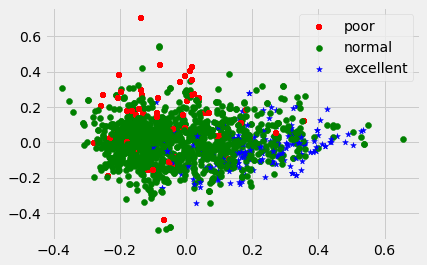

In [18]:
plt.style.use('fivethirtyeight')
for i in range(0,X_reshaped.shape[0]):
    if y[i]==0:
        class_1=plt.scatter(X_reshaped[i,0],X_reshaped[i,1],c='r',marker='+')
    elif y[i]==1:
        class_2=plt.scatter(X_reshaped[i,0],X_reshaped[i,1],c='g',marker='o')
    elif y[i]==2:
        class_3=plt.scatter(X_reshaped[i,0],X_reshaped[i,1],c='b',marker='*')
plt.legend([class_1,class_2,class_3],['poor','normal','excellent'])
plt.show()

In [19]:
X_train_reshaped,X_test_reshaped,y_train_reshaped,y_test_reshaped=train_test_split(X_reshaped,y,test_size=0.2,random_state=42)
clf.fit(X_train_reshaped,y_train_reshaped)   

SVC(C=0.1, class_weight='balanced', gamma=1, kernel='poly')

In [20]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

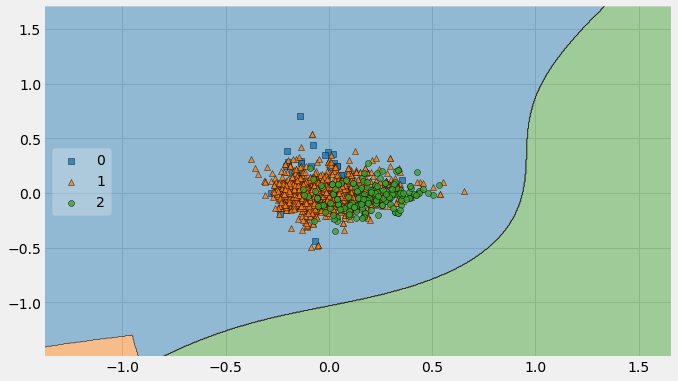

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
x_min,x_max=X_reshaped[:,0].min()-1,X_reshaped[:,0].max()+1
y_min,y_max=X_reshaped[:,1].min()-1,X_reshaped[:,1].max()+1
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plot_decision_regions(X=X_train_reshaped,y=y_train_reshaped,clf=clf,legend=6,ax=ax)

<AxesSubplot:>

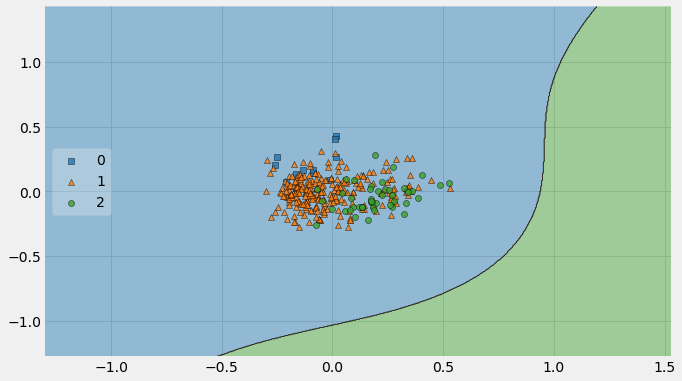

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
x_min,x_max=X_reshaped[:,0].min()-1,X_reshaped[:,0].max()+1
y_min,y_max=X_reshaped[:,1].min()-1,X_reshaped[:,1].max()+1
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plot_decision_regions(X=X_test_reshaped,y=y_test_reshaped,clf=clf,legend=6,ax=ax)

In [23]:
#using cross val pred instead of train test split

In [24]:
y_pred=cross_val_predict(clf,X,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_pred,average='weighted'),4)))

f1_score: 0.7954


In [25]:
cm=pd.DataFrame(confusion_matrix(y,y_pred),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])

In [26]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,11,51,1
true_normal,22,1201,96
true_excellent,2,136,79


In [27]:
y_reshaped_pred=cross_val_predict(clf,X_reshaped,y,cv=10)
print('f1_score: '+str(round(f1_score(y,y_reshaped_pred,average='weighted'),4)))

f1_score: 0.1782


<AxesSubplot:>

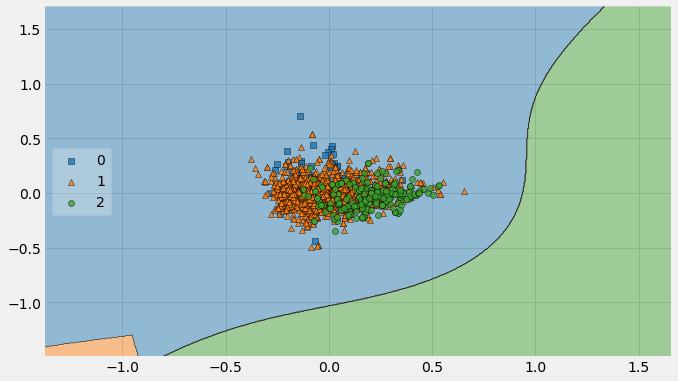

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
x_min,x_max=X_reshaped[:,0].min()-1,X_reshaped[:,0].max()+1
y_min,y_max=X_reshaped[:,1].min()-1,X_reshaped[:,1].max()+1
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
plot_decision_regions(X=X_reshaped,y=y,clf=clf,legend=6,ax=ax)